# Proyecto Final

María Montero, Marina Garrido

El primer paso para la realización de la práctica es instalar e importar las librerías que se necesitarán para este trabajo. De esta forma será posible cargar el archivo de datos, transformar la información para facilitar el análisis y contruir los diferentes modelos de estudio.

In [ ]:
pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Regresión
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LogisticRegression

# Reglas de asociación
from mlxtend.frequent_patterns import apriori, association_rules

# Árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

# SVM
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Descripción del dataset

La base de datos que se ha elegido es un dataset que recoge información de unos 300 mil pacientes. Las variables que se estudian en esta base de datos son las siguientes:

- `HeartDisease`: indica si una persona ha sufrido una enfermedad coronaria.

- `BMI`: índice de masa corporal.

- `Smoking`: indica si el paciente ha fumado, por lo menos, 100 cigarrillos a lo largo de su vida.

- `AlcoholDrinking`: indica si bebe una gran cantidad de alcohol.

- `Stroke`: indica si el paciente ha sufrido un infarto.

- `PhysicalHealth`: número de días en el mes en los que la salud física no ha sido buena.

- `MentalHealth`: número de días en el mes en los que la salud mental no ha sido buena.

- `DiffWalking`: indica si tiene dificultad al andar o subir y bajar escaleras

- `Sex`: sexo del paciente.

- `AgeCategory`: rango de edad del paciente.

- `Race`: etnia a la que pertenece la persona.

- `Diabetic`: indica el grado de diabetes del paciente.

- `PhysicalActivity`: indica si se ha realizado ejercicio en los últimos 30 días.

- `GenHealth`: indica la calidad de la salud en general.

- `SleepTime`: media de horas de sueño en un periodo de 24h.

- `Asthma`: indica si la persona es asmática.

- `KidneyDisease`: indica si el paciente ha sufrido enfermedades de riñón.

- `SkinCancer`: indica si el paciente ha sufrido cancer de piel.

In [ ]:
data = pd.read_csv('heart.csv')

print(data.shape)
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(319795, 18)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Este dataset contiene tanto variables numéricas como categóricas divididas de la siguiente forma:

- Variables numéricas: `BMI`, `PhysicalHealth`, `MentalHealth`, `SleepTime`

- Variables categóricas: `HeartDisease`, `Smoking`, `AlcoholDrinking`, `Stroke`, `DiffWalking`, `Sex`, `AgeCategory`, `Race`, `Diabetic`, `PhysicalActivity`, `GenHealth`, `Asthma`, `KidneyDisease`, `SkinCancer`

## Preprocesamiento del dataset

### Limpieza del conjunto de datos

Una vez establecido el conjunto de datos para el estudio, se procede a la limpieza de los registros. Esto evita  los datos redundantes, incompletos o incorrectos que altere las soluciones obtenidas de los algoritmos y conduzca a establecer un análisis incorrecto de la información.

In [ ]:
data = data.drop_duplicates()

data.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     301717 

Ya eliminados los elementos repetidos y habiendo comprobado la ausencia de registros nulos, se procede al estudio de posibles outliers en los datos. Los valores outliers son aquellos valores que se encuentran fuera de los rangos normales de valores para una categoría.

Matemáticamente se identifican como aquellos valores menores a `Q1 - 1.5 * IQR` o mayores que `Q3 + 1.5 * IQR`. Entendiendo `Q1` y `Q3` como los cuartiles 1 y 2 de la distribución de la variable, y siendo `IQR` la diferencia entre `Q3` y `Q1`. Estos valores se puden distinguir fácilmente en un diagrama de caja. A continuación, se muestran las distribuciones de las cuatro variables numéricas: `BMI`, `PhysicalHealth`, `MentalHealth` y `SleepTime`.



**BMI**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


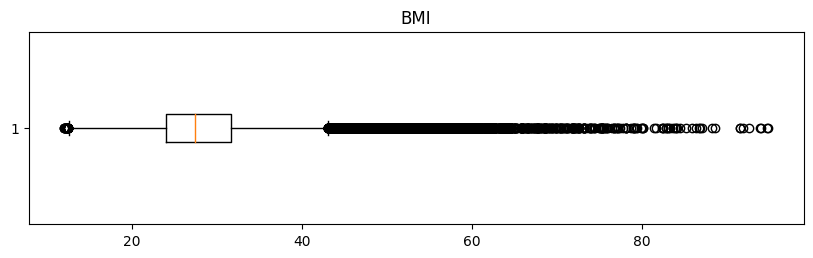

In [ ]:
plt.figure(figsize = (10, 2.5))
plt.boxplot(data['BMI'], vert = False)
plt.title('BMI')
plt.show()

A simple vista, los valores atípicos asociados a la variable `BMI` son aquellos menores a 10 y mayores a 40, aproximadamente. También se puede observar en el gráfico que la parte derecha es menor que la izquierda. Esto significa que los índices de masa corporal comprendidos entre el 50% y el 75% de la muestra se encuentran más dispersos que los que están entre el 25% y el 50%.

**PhysicalHealth**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


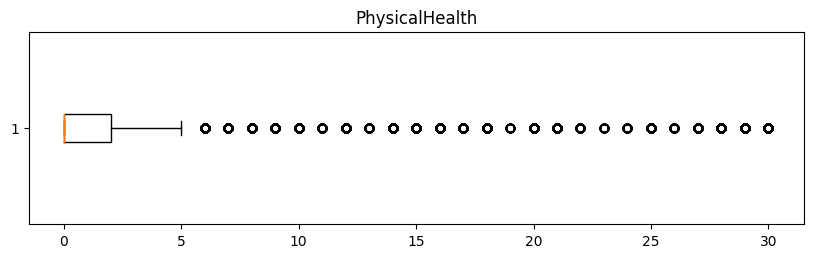

In [ ]:
plt.figure(figsize = (10, 2.5))
plt.boxplot(data['PhysicalHealth'], vert = False)
plt.title('PhysicalHealth')
plt.show()

Mirando el gráfico, los valores atípicos que aparecen en la variable `PhysicalHealth` son aquellos mayores a 5. Además, se puede apreciar que los datos comprendidos entre el 50% y el 75% de la población tienen una dispersión mucho mayor que los comprendidos entre el 25% y el 50%. Esto indica que la mayoría de estos individuos no han considerado encontrarse con salud física buena ningún día.

**MentalHealth**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


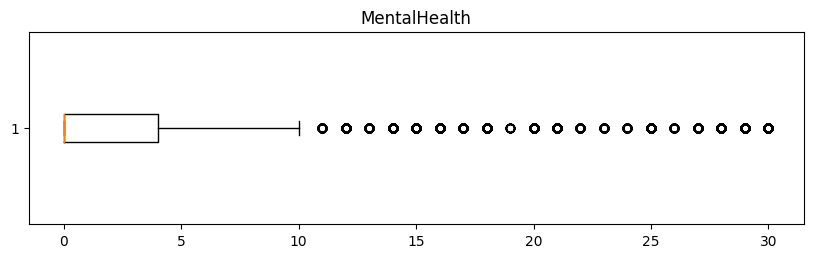

In [ ]:
plt.figure(figsize = (10, 2.5))
plt.boxplot(data['MentalHealth'], vert = False)
plt.title('MentalHealth')
plt.show()

Si se observa la dispersión que muestra el gráfico, para la variable `MentalHealth` se consideran valores atípicos aquellos mayores a 10. Al igual que en la variable `PhysicalHealth`, la dispersión de los datos comprendidos entre el 50% y el 75% es mucho mayor a la de los valores entre el 25% y el 50%. Indicando también una mayoría de individuos que indican no haber experimentado una buena salud mental en todo el mes.

**SleepTime**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


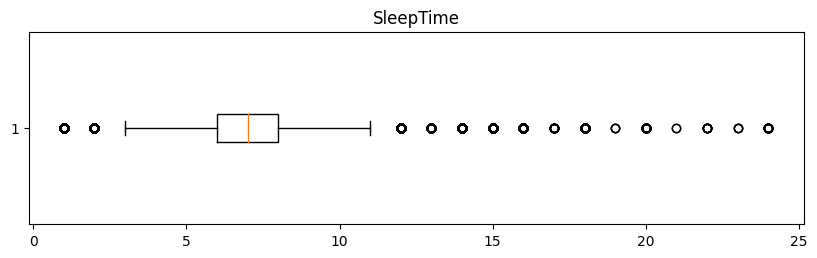

In [ ]:
plt.figure(figsize = (10, 2.5))
plt.boxplot(data['SleepTime'], vert = False)
plt.title('SleepTime')
plt.show()

Observando el gráfico, para la variable `SleepTime` se consideran valores atípicos aquellos mayores a 10 y menores a 3, aproximadamente. En este caso, la dispersión de datos entre los datos comprendidos entre el 25% y el 50%, y entre el 50% y el 75% es parecida.

De estas variables, los valores outliers que se eliminarán serán solamente de las variables `BMI` y `SleepTime`. Esto se debe a que los valores atípicos de las otras variables, a pesar de salirse del rango normal siguen siendo valores adecuados. Para las variables `BMI` y `SleepTime` se consideran los outliers como valores erróneos que no pueden darse en la realidad.

Para tratar estos valores se define la función `outlier` donde se definen los valores para los cuartiles 1 y 3 y, con estos, se calculan los límites del rango de valores aceptado.

Una vez encontrado este rango, los valores que no pertenezcan al intervalo se sustituyen por el valor medio del conjunto. De esta forma, se mantiene la distribución de los datos con cambios mínimos.

In [ ]:
def outlier(data, col):
  q1 = data[col].describe()[4]
  q3 = data[col].describe()[6]
  mean = data[col].describe()[1]

  min = q1 - 1.5 * (q3 - q1)
  max = q3 + 1.5 * (q3 - q1)

  return min, max, mean

for col in ['BMI', 'SleepTime']:
  min, max, mean = outlier(data, col)
  print('Rango de valores aceptados para ', col,
        ':', (round(min), round(max)))

  data.loc[data[col] < min, col] = mean
  data.loc[data[col] > max, col] = mean

Rango de valores aceptados para  BMI : (13, 43)
Rango de valores aceptados para  SleepTime : (3, 11)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Objetivo de la práctica

El objetivo de esta práctica es resolver un problema predictivo aplicando los diferentes algoritmos estudiados a lo largo del curso. Teniendo en cuenta estas variables, el objetivo de la práctica se centrará en predecir si un paciente sufrirá una enfermedad cardiaca en función de los valores de las otras variables.

Si observamos en el siguiente gráfico, aunque la mayoría de personas no presentan problemas de corazón, un 9% sí. En este dataset donde se recoge la información de más de 301717 individuos, ese 9% equivale a 27100 personas.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


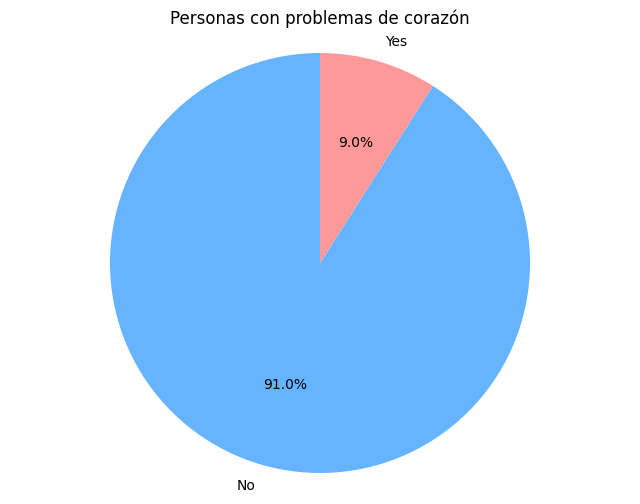

In [ ]:
# Contar los valores de la columna HeartDisease
p_enfermas = data['HeartDisease'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.pie(p_enfermas, labels=p_enfermas.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Personas con problemas de corazón')
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()

La enfermedad cardíaca es la principal causa de muerte en varias regiones del mundo, pero hay formas de prevenir y controlar muchos tipos de enfermedades del corazón.

Es por esto que se tratará de predecir cuándo una persona tendrá riesgo de padecer un problema de corazón.

### Transformación de los datos

En el proceso de transformación de datos se pretende conseguir que la información representada en el dataset se adecue a los algoritmos donde se va a implementar. De esta manera se consigue obtener mejores modelos y soluciones que se ajustan a la realidad que reflejan los datos.

Como esto depende del algoritmo que se quiere implementar, se realizará antes de cada modelo. Así, solo se modificará lo necesario para el funcionamiento de cada algoritmo.

## Aplicación de algoritmos predictivos

Los modelos predictivos son modelos donde se utilizan variables de valor conocido para determinar valores futuros de otras variables. Dentro de los modelos de predicción existen diferentes tipos como por ejemplo, la regresión, los modelos de reglas de asociación, árboles de decisión o algoritmos como el Support Vector Machine.

### Regresión

La regresión es un modelo de predicción en el que se emplea las características numéricas de diferentes variables, siguiendo modelos de dependencia, para calcular los valores futuros de la variable objetivo. Algunas definiciones importantes para este modelo son:

- Variable independiente (**X**): son las variables en las que se basa la predicción.

- Variable dependiente (**y**): es la variable objetivo de la que se predicen los valores.

- Coeficiente de correlación: es el valor que cuantifica el grado de relación lineal entre dos variables, indeendientemente de las unidades de cada una de ellas.

Existen diferentes modelos de regresión en función del número de varibles independientes empleadas en la predicción o el tipo de dato de la variable dependiente.

Para aplicar un modelo de regresión se necesita un conjunto de datos numéricos, por tanto, se transforman las variables categóricas a numéricas. Aquellas con valores `Yes` y `No` quedarán como `1` y `0`. Para las variables `AgeCategory`, `GenHealth` y `Diabetic` se ordenan los valores de menor a mayor para facilitar la identificación y, para la variable `Race` quedarán ordenados alfabéticamente de forma ascendente. Estos últimos valores quedarán sustituidos por la posición que toman en la lista.

In [ ]:
num = data.replace(['Yes', 'No'], [1, 0])
num['Sex'] = num['Sex'].replace(['Female', 'Male'], [1, 0])

age = num['AgeCategory'].sort_values().unique()
num['AgeCategory'] = num['AgeCategory'].replace(age, list(range(len(age))))

race = num['Race'].sort_values().unique()
num['Race'] = num['Race'].replace(race, list(range(len(race))))

health = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
num['GenHealth'] = num['GenHealth'].replace(health, list(range(len(health))))

diabetic = ['No', 'Yes', 'No, borderline diabetes', 'Yes (during pregnancy)']
num['Diabetic'] = num['Diabetic'].replace(diabetic, list(range(len(diabetic))))

num.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,7,5,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,12,5,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,5,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,4,5,0,1,3,8.0,0,0,0


Se calcula la matriz de correlación y se seleccionan los cuatro elementos con mayor correlación a la variable `HeartDisease`. Con estas variables se quiere construir un modelo de regresión logística múltiple que prediga si se va a sufrir una enfermedad cardiaca.

In [ ]:
corr = num.corr()

heart = pd.DataFrame(abs(corr.loc['HeartDisease']).sort_values())
heart = heart.drop(index = 'HeartDisease').tail(4)
for i in heart.index:
  if corr.loc[i, 'HeartDisease'] < 0:
    heart.loc[i] = -heart.loc[i]
heart

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HeartDisease
Stroke,0.194665
DiffWalking,0.196420
GenHealth,-0.237920
AgeCategory,0.239259


Una vez identificadas las variables independientes y la variable objetivo, se separa cada conjunto en dos. Un conjunto de entrenamiento del modelo y otro de test para calcular la precisión del modelo.

In [ ]:
X = num[['Stroke', 'DiffWalking', 'GenHealth', 'AgeCategory']]
y = num['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 50)

print('Entrenamiento:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Entrenamiento: (241373, 4) (241373,)
Test: (60344, 4) (60344,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
regresion = LogisticRegression().fit(X_train, y_train)
y_reg = regresion.predict(X_test)

mse = mean_squared_error(y_test, y_reg)
print('Error cuadrático medio:', mse)

accuracy_reg = accuracy_score(y_test, y_reg)
print('Precisión:', accuracy_reg)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Error cuadrático medio: 0.09043152591806973
Precisión: 0.9095684740819303


El modelo obtenido presenta un error cuadrático medio de 0.073. El ECM es un estimador que mide el cuadrado del promedio de los errores, es decir, la diferencia entre el valor estimado y el real. Al ser cercano a 0 este modelo se puede considerar adecuado para predecir si se va a sufrir una enfermedad cardiaca. Además, tiene una precisión del 90.95%.

### Reglas de asociación

El modelo de reglas de asociación trata, dado un conjunto de registros, de encontrar una serie de reglas de dependencia que soporten la predicción de diferentes ocurrencias basándose en otros registros. Algunos elementos importantes de este modelo son:

- Regla de asociación: **X** → **Y**

- Itemset: es el colección de elementos con el que trabaja el modelo. Un k-itemset será por tanto una colección de k elementos.

- Frecuencia de soporte: es la frecuencia en la que aparece un conjunto en el itemset.

- Soporte: es la proporción entre la frecuencia de soporte de un conjunto y el total de transacciones. Es decir, es la probabilidad condicional de que una transacción que contiene **X** contenga también **Y**, siguiendo los elementos planteados en una regla.

- Confianza: es la frecuencia con que los elementos en **Y** aparecen en transacciones que contienen a **X**. Explicado de otra manera, es la probabilidadde que una transacción contenga los elementos **X** e **Y** frente a las que sólo contienen **X**.

Se dice que un itemset es frecuente si su valor de soporte es mayor o igual al umbral o soporte mínimo establecido.

Los algoritmos que se emplean en la obtención de reglas de asociación requieren atributos categóricos. Por tanto, antes de introducir los datos al modelo, se categorizan las variables numéricas. Para ello, se dividen los registros de cada variables en tres categorías dependiendo de lo siguiente:
- `bajo` : si el valor está por debajo del valor que marca el primer cuartil de los datos.
- `medio`: si el valor se encuentra entre los valores que indican el primer y tercer cuartil.
- `alto`: si el valor es mayor al valor que señala el tercer cuartil.

In [ ]:
def categorizar(value):
  if value <= min:
    return 'bajo'
  elif value >= min+1 and value <= max:
    return 'medio'
  else:
    return 'alto'

for col in ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']:
  d = data[col].describe()
  min, max = d[4], d[7]

  data[col] = data[col].apply(categorizar)

print(data.shape)
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(301717, 18)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,bajo,Yes,No,No,medio,medio,No,Female,55-59,White,Yes,Yes,Very good,bajo,Yes,No,Yes
1,No,bajo,No,No,Yes,bajo,bajo,No,Female,80 or older,White,No,Yes,Very good,medio,No,No,No
2,No,medio,Yes,No,No,medio,medio,No,Male,65-69,White,Yes,Yes,Fair,medio,Yes,No,No
3,No,alto,No,No,No,bajo,bajo,No,Female,75-79,White,No,No,Good,bajo,No,No,Yes
4,No,bajo,No,No,No,medio,bajo,Yes,Female,40-44,White,No,Yes,Very good,medio,No,No,No


Además, el algoritmo que se va a emplear trabaja únicamente con variables dummies y, por tanto, se deben transformar todas las variables. Las variables dummies representan la información a través de categorías binarias 0 o 1 para indicar la ausencia o presencia de una característica. Explicado de otra forma, las categorías de cada variable se convierten en columnas con registros de valor 1 (si ese registro presentaba ese valor) o 0 (si no presentaba el valor indicado).

In [ ]:
dummies = pd.get_dummies(data)

print(dummies.shape)
dummies.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(301717, 57)


,HeartDisease_No,HeartDisease_Yes,BMI_alto,BMI_bajo,BMI_medio,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,GenHealth_Poor,GenHealth_Very good,SleepTime_bajo,SleepTime_medio,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,True,False,False,True,False,False,True,True,False,True,...,False,True,True,False,False,True,True,False,False,True
1,True,False,False,True,False,True,False,True,False,False,...,False,True,False,True,True,False,True,False,True,False
2,True,False,False,False,True,False,True,True,False,True,...,False,False,False,True,False,True,True,False,True,False
3,True,False,True,False,False,True,False,True,False,True,...,False,False,True,False,True,False,True,False,False,True
4,True,False,False,True,False,True,False,True,False,True,...,False,True,False,True,True,False,True,False,True,False


Una vez obtenidos los datos en el formato adecuado, se puede proceder al desarrollo del algoritmo. En este caso se ha seleccionado el algoritmo a priori. Este es el método principal empleado en la obtención de reglas de asociación.

Estos modelos opera en dos fases. En la primera fase, se generan de manera iterativa conjuntos de itemsets frecuentes a partir de k = 1, hasta que ya no se encuentren más subconjuntos, y se guardan en una nueva variable. En la segunda parte se extraen las reglas obtenidas y se evalua su validez en función de la confianza.

En este primer modelo se empleará un soporte mínimo de 0.8 y una confianza de 0.75. Es decir, para considerar un itemset como frecuente debe aparecer en el 80% de registros y, para aceptar una regla, debe tener una confianza mayor al 75%.

In [ ]:
frequent = apriori(dummies, min_support = 0.8, use_colnames = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules = association_rules(frequent, metric = 'confidence', min_threshold = 0.75)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(frequent.shape)
frequent

(34, 2)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.909647,(HeartDisease_No)
1,0.928473,(AlcoholDrinking_No)
2,0.960016,(Stroke_No)
3,0.852991,(DiffWalking_No)
4,0.834544,(Diabetic_No)
5,0.858639,(Asthma_No)
6,0.960970,(KidneyDisease_No)
7,0.902916,(SkinCancer_No)
8,0.841902,"(HeartDisease_No, AlcoholDrinking_No)"
9,0.884209,"(Stroke_No, HeartDisease_No)"


In [ ]:
print(rules.shape)
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(92, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(HeartDisease_No),(AlcoholDrinking_No),0.909647,0.928473,0.841902,0.925525,0.996826,-0.002681,0.960425,-0.034045
1,(AlcoholDrinking_No),(HeartDisease_No),0.928473,0.909647,0.841902,0.906760,0.996826,-0.002681,0.969031,-0.042623
2,(Stroke_No),(HeartDisease_No),0.960016,0.909647,0.884209,0.921037,1.012521,0.010934,1.144237,0.309267
3,(HeartDisease_No),(Stroke_No),0.909647,0.960016,0.884209,0.972036,1.012521,0.010934,1.429835,0.136862
4,(KidneyDisease_No),(HeartDisease_No),0.960970,0.909647,0.882065,0.917890,1.009062,0.007921,1.100391,0.230091


Una vez obtenidas las reglas asociadas a este problema, se buscan aquellas que indiquen que el paciente tendrá problemas cardiacos. Es decir, se buscan aquellas reglas que presenten el valor `HeartDisease_Yes` como consecuente.

In [ ]:
yes = frozenset({'HeartDisease_Yes'})
idx = []

for i in range(rules.shape[0]):
  if yes.issubset(rules.loc[i, 'consequents']):
    idx.append(i)

rules.loc[idx]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Ninguna regla tiene como consecuencia tener problemas cardiacos, por lo que se puede entender que este algoritmo no es el adecuado para estudiar el problema planteado.

### Support Vector Machine

El **SVM** (Support Vector Machine) es un algoritmo de aprendizaje supervisado que se utiliza principalmente para problemas de clasificación, regresión o para predicción.

El objetivo principal es encontrar el hiperplano que mejor separa los datos de diferentes clases en el espacio de características, maximizando los márgenes (distancias entre el hiperplano y los puntos de datos más cercanos de cada clase) para mejorar la separación entre clases y generalizar mejor el modelo a nuevos datos.


En primer lugar, se va a guardar la clase en una variable y se eliminará del dataset transformado previamente.

In [ ]:
y = num['HeartDisease']
X = num.drop('HeartDisease', axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


En un principio la idea era coger un 70% de los datos para entrenamiento y un 30% de los datos para test, sin embargo, debido al tamaño de la base de datos se ha decidido hacer la repartición a la inversa, de manera que el tiempo de ejecución disminuye considerablemente.

In [ ]:
X_ent, X_prub, y_ent, y_prub = train_test_split(X, y, test_size=0.7, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tras dividir los datos es necesario realizar una estandarización de las características ya que el algoritmo SVM es sensible a las escalas de los datos. Se van a estandarizar para que tengan media 0 y desviación estándar 1.

In [ ]:
scaler = StandardScaler()
X_ent = scaler.fit_transform(X_ent)
X_prub = scaler.transform(X_prub)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Finalmente, se aplica el algoritmo SVM con un kernel lineal que matemáticamente se calcula como:

`K(xi, xj) = xi*xj`

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_ent, y_ent)

y_svm = svm.predict(X_prub)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tras la creación del modelo se va a evaluar su funcionamiento:

In [ ]:
accuracy_svm = accuracy_score(y_prub, y_svm)
print('Precisión:', accuracy_svm)

Precisión: 0.9101571007850304


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Se obtiene una precisión del 91%. lo que indica que se trata de un buen modelo de precisión.

### Árboles de decisión

El objetivo de los algoritmos basados en árboles de decisión es el análisis de decisiones secuenciales según el uso de resultados y probabilidades asociadas. Algunas definiciones clave para tratar con estos modelos son:

- Nodo de decisión (hoja): es el nodo que indica la decisión que ha de tomarse en ese momento del proceso. Gráficamente se representa como un cuadrado.

- Nodo de probabilidad: es el nodo que indica la ocurrencia de eventos aleatorios. De manera gráfica se representa mediante un círculo.

- Rama: es la representación de los distintos caminos posibles entre nodos. En un gráfico está reresentada por una flecha.

Para poder calcular la precisión y el error, se debe separar el conjunto de datos y las etiquetas en entrenamiento y test. En este caso, se utilizará un 80% de los datos para entrenar y un 20% para validar ya que no son excesivos datos.

Además, se guardarán las etiquetas, que corresponden a los valores de la variable HeartDisease y se eliminará esa columna del dataset.


In [ ]:
etiquetas = num.HeartDisease
etiquetas.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    0
1    0
2    0
3    0
4    0
Name: HeartDisease, dtype: int64

In [ ]:
datos = num.drop(columns = ['HeartDisease'])
datos.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,1,7,5,1,1,3,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,1,12,5,0,1,3,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,0,9,5,1,1,1,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,1,11,5,0,0,2,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,1,4,5,0,1,3,8.0,0,0,0


In [ ]:
# 80%
x_entre = datos.iloc[0:241373,:]
etiq_entre = etiquetas[0:241373]

# 20%
x_test = datos.iloc[241374:,:]
etiq_test = etiquetas[241374:]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


En primer lugar, se creará el clasificador **utilizando criterio Gini**, por tanto, se está empleando el algoritmo de CART.

Para crear el árbol utilizamos la función `DecisionTreeClassifier` y para entrenarlo la función `fit`. Se van a tener que limitar ciertos parámetros ya que en caso contrario se obtiene ur árbol ilegible, imposible de analizar.
Para limitar la profundidad del árbol se usa el parámetro `max_depth`, por otro lado, se usará `min_samples_split` para calcular el número mínimo de muestras necesarias para dividir un nodo y `min_samples_leaf` que determinará el número mínimo de muestras que debe tener un nodo hoja.

In [ ]:
arbol=DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5)
arbol.fit(x_entre,etiq_entre)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


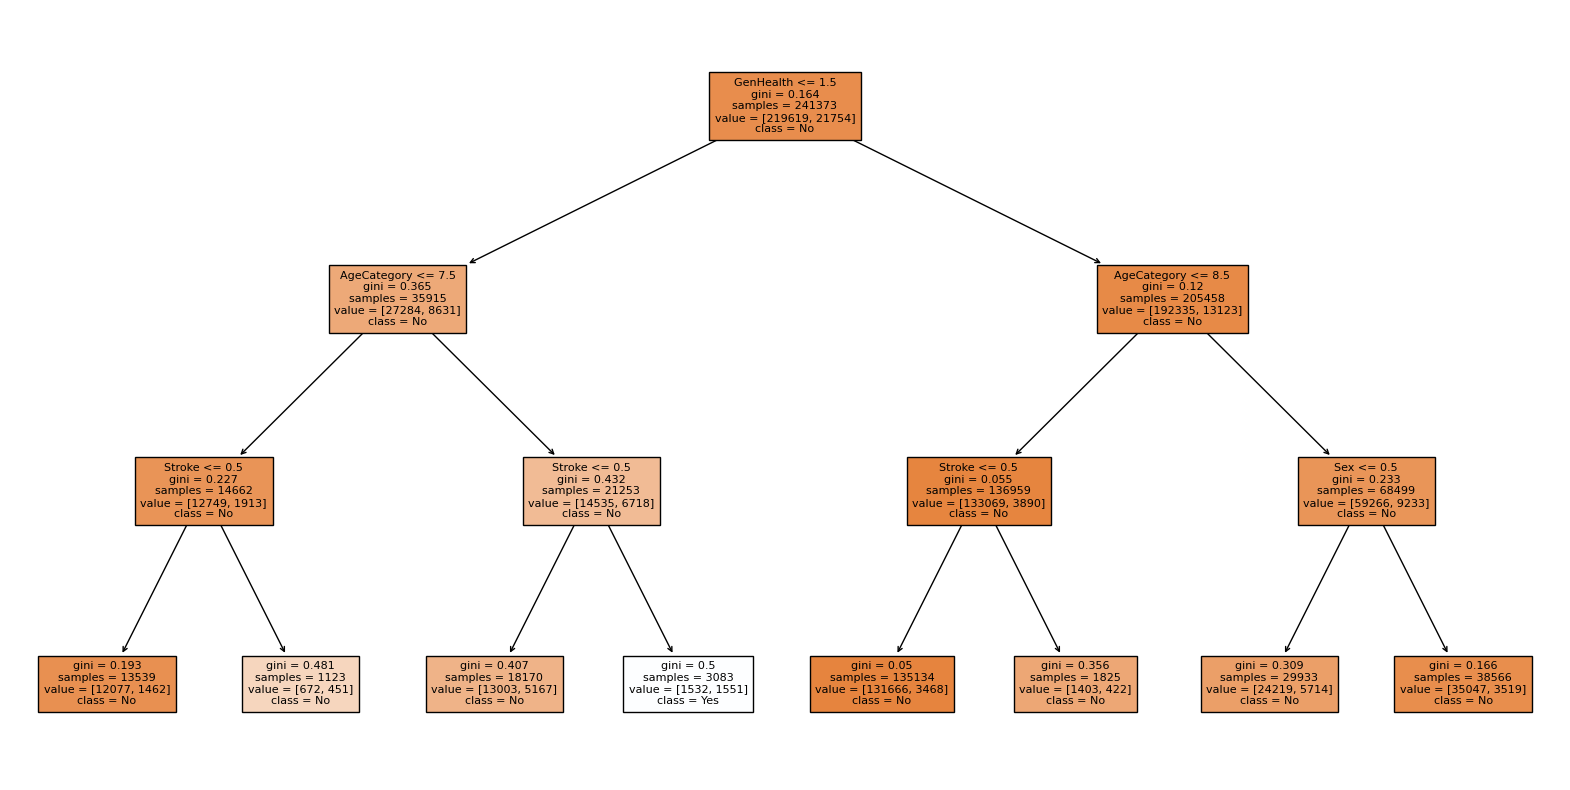

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(decision_tree=arbol, feature_names=datos.columns, class_names=['No', 'Yes'], filled=True, fontsize=8)
plt.show()

Como resultado, obtenemos el árbol de clasificación anterior que se compone de los nodos de probabilidad (punto en el que ocurre un evento), nodos de decisión (la decisión que se toma en ese punto) y las ramas (distintos caminos que se pueden seguir al tomar una decisión) y que tiene 4 niveles.
Cada nodo contiene la variable a la que se le hace la pregunta, el valor del índice de gini, el número de individuos que comparten esas características, una lista en la que se muestra de los individuos con esas características cuántos padecen problemas de corazón y cuántos no, es decir; `[1,0]` y la clase resultante a la que pertenece.

In [ ]:
y_tree = arbol.predict(x_test)
y_tree

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0, 0, 0, ..., 0, 0, 0])

Veamos cuál es la matriz de confusión.

In [ ]:
confusion_matrix(etiq_test, y_tree)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[54477,   359],
       [ 5115,   392]])

De los datos de test hay: 54477 verdaderos positivos, 359 falsos positivos, 5115 falsos negativos y 392 verdaderos negativos.

In [ ]:
accuracy_tree = accuracy_score(etiq_test, y_tree)
print('Precisión:', accuracy_tree)

Error = 1 - accuracy_tree
print('Error:', Error)

Precisión: 0.9092852526390799
Error: 0.09071474736092011


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Si calculamos la tasa de acierto de este modelo, se ve que es de un 90.9%, por lo que cuenta con un error del 9%..

## Representación visual

In [ ]:
accuracy = pd.DataFrame({'Precisión': [accuracy_reg, accuracy_svm, accuracy_tree]},
                        index = ['regresión', 'svm', 'árbol de decisión'])
accuracy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Precisión
regresión,0.909568
svm,0.910157
árbol de decisión,0.909285


De todos los modelos presentados el que mayor resultados ofrece es el algoritmo de Support Vector Machine con un 91% de precisión, aunque los otros modelos tienen valores cercanos.

Se propone unos ejemplos diferentes al dataset para estudiar el resultado que ofrecen los diferentes algoritmos.

### Ejemplo 1

Se presenta a una mujer que tiene un BMI de 16, que fuma pero no bebe alcohol ni ha sufrido un infarto, que tan solo ha tenido 3 días donde la salud física no ha sido buena y 30 en los que la salud mental ha sido mala. No tiene dificultad al andar, en un rango de edad de nivel 7, diabética, que realiza ejercicio, con una calidad de salud de nivel 3 y una media de 5 horas de sueño. Padece asma, nunca ha sufrido enfermedades de riñón, pero sí ha tenido cáncer de piel.

In [ ]:
caso1 = [16, 1, 0, 0, 3, 30, 0, 1, 7, 5, 1, 1, 3, 5, 1, 0, 1]
caso1 = pd.DataFrame([caso1], columns = X.columns[0:])

y_reg = regresion.predict(caso1[['Stroke', 'DiffWalking', 'GenHealth', 'AgeCategory']])
y_svm = svm.predict(caso1)
y_tree = arbol.predict(caso1)

pred = pd.DataFrame({'Caso 1': [y_reg, y_svm, y_tree]},
                        index = ['regresión', 'svm', 'árbol de decisión'])
pred

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


,Caso 1
regresión,[0]
svm,[0]
árbol de decisión,[0]


Finalmente, el paciente no padece una enfermedad cardiaca.

## Ejemplo 2

En este otro caso se va a presentar a otra mujer que cuenta con un BMI de 30, que fuma y bebe alcohol. Ha sufrido un infarto aunque tan solo ha tenido 3 días donde la salud física no ha sido buena y ningún día en que la salud mental ha sido mala. No tiene dificultad al andar, en un rango de edad de nivel 12, diabética, que realiza ejercicio, con una calidad de salud de nivel 1 y una media de 5 horas de sueño. Padece asma y ha sufrido enfermedades de riñón y cáncer de piel.

In [ ]:
caso2 = [30, 1, 1, 1, 3, 0, 0, 1, 12, 5, 1, 1, 1, 5, 1, 1, 1]
caso2 = pd.DataFrame([caso2], columns = X.columns[0:])

y_reg = regresion.predict(caso2[['Stroke', 'DiffWalking', 'GenHealth', 'AgeCategory']])
y_svm = svm.predict(caso2)
y_tree = arbol.predict(caso2)

pred = pd.DataFrame({'Caso 2': [y_reg, y_svm, y_tree]},
                        index = ['regresión', 'svm', 'árbol de decisión'])
pred

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


,Caso 2
regresión,[1]
svm,[0]
árbol de decisión,[1]


Finalmente se comprueba que, con las características propuestas, el paciente sí que tendría una enfermedad cardiaca en 2 de los modelos pero no para el modelo SVM.